**Download dataset from kaggle**

In [1]:
import kagglehub
dataset = kagglehub.dataset_download('vishweshsalodkar/wild-animals')

print('Data source import complete.')

100%|██████████| 7.37M/7.37M [00:00<00:00, 48.3MB/s]

Extracting files...


Data source import complete.


Importing libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

Dataset Loading

In [3]:
print(os.listdir(dataset))
dataset = os.path.join(dataset, "Animals")
print(os.listdir(dataset))
categories = os.listdir(dataset)
print(categories)
print([os.listdir(os.path.join(dataset, category)) for category in categories])

['Animals']
['Jaguar', 'Tiger', 'Cheetah', 'Leopard', 'Lion']
['Jaguar', 'Tiger', 'Cheetah', 'Leopard', 'Lion']
[['jaguar-1727406__340.jpg', 'photo-1469367498026-54a83d222f12.jpg', 'pexels-photo-7124473.jpeg', 'jaguar-halbwuchsig-sepia-profile-41002.jpeg', 'pexels-photo-155164.jpeg', 'photo-1552845301-7ff61cbb2865.jpg', 'photo-1528238344097-a8994f7c74e4.jpg', 'pexels-photo-8562894.jpeg', 'photo-1604994956847-2b0ab169366b.jpg', 'jaguar-1337201__340.jpg', 'africa-animals-zoo-tiger.jpg', 'pexels-photo-4468189 (1).jpeg', 'photo-1577053711673-cdf8e87a38e5.jpg', 'jaguar-859412__340.jpg', 'photo-1601544359642-c76c4f7c3221.jpg', 'photo-1584313452299-86bbb3f16eca.jpg', 'pexels-photo-5899760.jpeg', 'pexels-photo-4468189.jpeg', 'photo-1477949775154-d739b82400b3 (1).jpg', 'photo-1477949775154-d739b82400b3.jpg', 'photo-1534759846116-5799c33ce22a.jpg', 'photo-1614371611363-bbce32167c6c.jpg', 'animal-2607__340.jpg', 'photo-1584307228520-94ee423187ed.jpg', 'photo-1584313453147-be9beeb8504f.jpg', 'pexe

Dataset Preprocessing

In [4]:
train_data = []

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_array = cv2.resize(img_gray, (256, 256))
        train_data.append((img_array, label))

100%|██████████| 32/32 [00:00<00:00, 99.59it/s] 


Dataset Size

In [5]:
print(len(train_data))

170


Print 10 data

In [6]:
print([train_data[i][1] for i in range(10)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Shuffle & Display 10 data

In [7]:
np.random.shuffle(train_data)
print([train_data[i][1] for i in range(10)])

[2, 2, 4, 3, 0, 0, 0, 3, 0, 0]


Visualize Whole Dataset

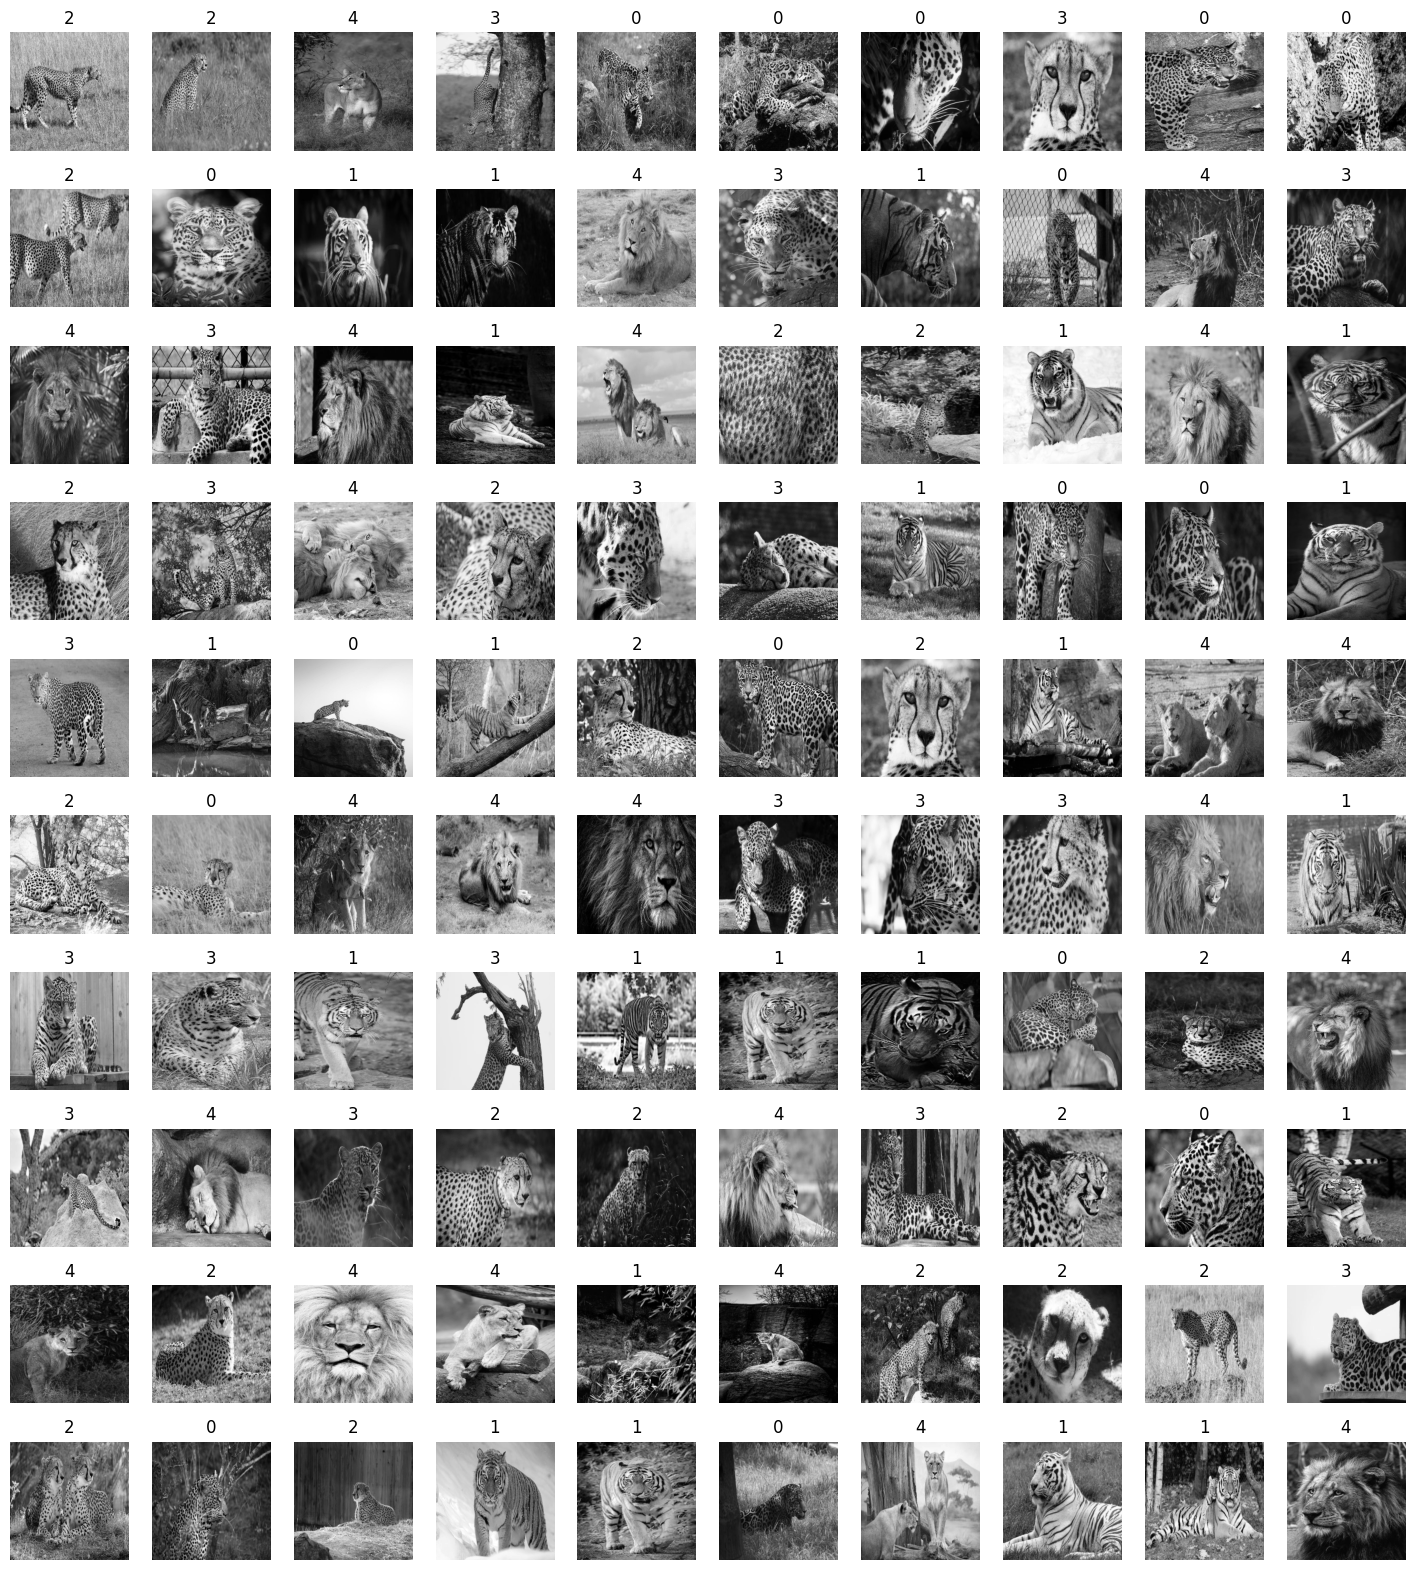

In [8]:
fig, axes = plt.subplots(10, 10, figsize=(18, 20))

for (img_array, label), ax in zip(train_data, axes.flat):
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.show()

Split into 5 folds

In [9]:
folds = [train_data[i::5] for i in range(5)]
for i, fold in enumerate(folds):
    labels = [label for _, label in fold]
    print(f"Fold {i+1}: {labels} Count: {len(fold)}")

Fold 1: [2, 0, 2, 3, 4, 2, 2, 3, 3, 0, 2, 3, 3, 1, 3, 4, 4, 4, 2, 0, 2, 4, 2, 3, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2] Count: 34
Fold 2: [2, 0, 0, 1, 3, 2, 3, 1, 1, 2, 0, 3, 3, 1, 4, 3, 2, 2, 0, 4, 1, 3, 1, 3, 2, 1, 4, 2, 2, 2, 2, 0, 1, 4] Count: 34
Fold 3: [4, 3, 1, 0, 4, 1, 4, 0, 0, 1, 4, 3, 1, 0, 3, 2, 4, 2, 2, 1, 3, 3, 1, 2, 2, 3, 2, 3, 1, 4, 3, 1, 0, 1] Count: 34
Fold 4: [3, 0, 1, 4, 1, 4, 2, 0, 1, 4, 4, 4, 3, 2, 2, 0, 4, 2, 1, 1, 3, 1, 2, 2, 4, 3, 1, 0, 1, 0, 2, 0, 1, 1] Count: 34
Fold 5: [0, 0, 4, 3, 4, 1, 3, 1, 2, 4, 4, 1, 1, 4, 2, 1, 1, 3, 1, 4, 0, 2, 4, 4, 0, 1, 0, 2, 3, 3, 2, 0, 4, 4] Count: 34


k-Nearest Neighbors (kNN) Cross-Validation with Accuracy Calculation

In [10]:
from collections import Counter

def l2_distance(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))


def knn_prediction(l2_distances, k = 1):
    knns = l2_distances[:k]
    knn_labels = [label for _, label in knns]
    most_common_label = Counter(knn_labels).most_common(1)[0][0]

    return most_common_label

fold_accuracies = []
avg_accuracies = []

for k in range(1, 31):
  accuracies = []
  for i in range(len(folds) - 1, -1, -1):
    predictions = []

    valid_set = folds[i]
    train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

    for valid_img in valid_set:
      l2_distances = []
      for train_img in train_set:
        distance = l2_distance(valid_img[0], train_img[0])
        l2_distances.append((distance, train_img[1]))
      l2_distances.sort()
      predicted_label = knn_prediction(l2_distances, k)

      if predicted_label == valid_img[1]:
        predictions.append(1)
      else:
        predictions.append(0)

    fold_accuracy = sum(predictions) / len(predictions)
    accuracies.append(fold_accuracy)

  fold_accuracies.append(accuracies)
  avg_accuracy = sum(accuracies) / len(accuracies)
  avg_accuracies.append(avg_accuracy)
  print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_accuracies}")
print(f"Average Fold Accuracies: {avg_accuracies}")

K: 1 Average Accuracy: 0.32
K: 2 Average Accuracy: 0.32
K: 3 Average Accuracy: 0.29
K: 4 Average Accuracy: 0.32
K: 5 Average Accuracy: 0.32
K: 6 Average Accuracy: 0.34
K: 7 Average Accuracy: 0.35
K: 8 Average Accuracy: 0.31
K: 9 Average Accuracy: 0.33
K: 10 Average Accuracy: 0.28
K: 11 Average Accuracy: 0.31
K: 12 Average Accuracy: 0.26
K: 13 Average Accuracy: 0.29
K: 14 Average Accuracy: 0.26
K: 15 Average Accuracy: 0.28
K: 16 Average Accuracy: 0.28
K: 17 Average Accuracy: 0.27
K: 18 Average Accuracy: 0.28
K: 19 Average Accuracy: 0.29
K: 20 Average Accuracy: 0.30
K: 21 Average Accuracy: 0.28
K: 22 Average Accuracy: 0.29
K: 23 Average Accuracy: 0.29
K: 24 Average Accuracy: 0.29
K: 25 Average Accuracy: 0.29
K: 26 Average Accuracy: 0.29
K: 27 Average Accuracy: 0.28
K: 28 Average Accuracy: 0.31
K: 29 Average Accuracy: 0.30
K: 30 Average Accuracy: 0.27
Fold Accuracies: [[0.3235294117647059, 0.23529411764705882, 0.38235294117647056, 0.38235294117647056, 0.29411764705882354], [0.323529411764

Visualizing Cross-validation Accuracy for k-Nearest Neighbors (kNN)

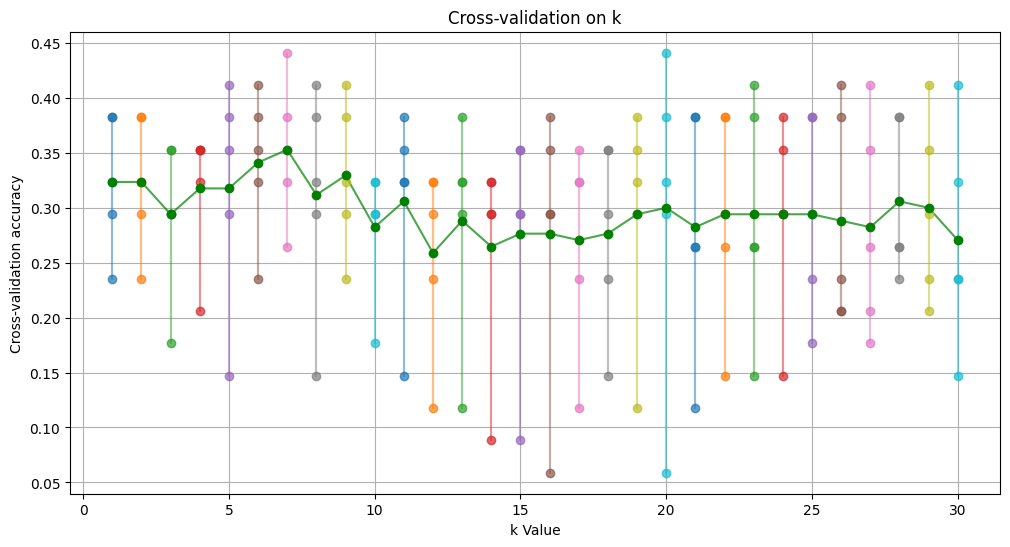

In [11]:
plt.figure(figsize=(12, 6))

for k, fold_accuracy in enumerate(fold_accuracies):
  plt.scatter([k+1] * len(fold_accuracy), fold_accuracy, zorder=5, alpha=0.7)
  plt.plot([k+1] * len(fold_accuracy), fold_accuracy, linestyle='-', alpha=0.5)


plt.plot(range(1, 31), avg_accuracies, color='green', alpha=0.7)
plt.scatter(range(1, 31), avg_accuracies, color='green', zorder=10)

plt.xlabel('k Value')
plt.ylabel('Cross-validation accuracy')
plt.title('Cross-validation on k')
plt.grid(True)

plt.show()